In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2022-11-13


'2022-11-13'

In [57]:
rkin = '[rkin430] (nM)'
IntDen = 'IntDen'
BackDen = 'Mean Bckgd IntDen'
mIntDen = 'MeanCorr IntDen'




In [50]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'

StartHue1 = Color(purple)
tub1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
tub2color = list(StartHue2.range_to(Color(lightorange),3))
print(tub1color,tub2color)

palette = [grey,cyan] + list(map(Color.get_hex,tub1color)) + list(map(Color.get_hex,tub2color)) + [green]
parameters = [IntDen,BackDen,mIntDen]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [51]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [52]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-10:] != 'results.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Kinesins/Int_den/Int_den_results.csv')]

In [53]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = pd.concat([data,d])

In [54]:
data

,[rkin430] (nM),Corrected IntDen,Mean Bckgd IntDen,MeanCorr IntDen,IntDen
0,0.05,-7038.0,110568.0,45058.500,103530
1,0.05,14382.0,110568.0,45058.500,124950
2,0.05,36057.0,110568.0,45058.500,146625
3,0.05,56967.0,110568.0,45058.500,167535
4,0.05,41667.0,110568.0,45058.500,152235
5,0.05,14382.0,110568.0,45058.500,124950
6,0.05,61302.0,110568.0,45058.500,171870
7,0.05,181152.0,110568.0,45058.500,291720
8,0.05,139587.0,110568.0,45058.500,250155
9,0.05,-87873.0,110568.0,45058.500,22695


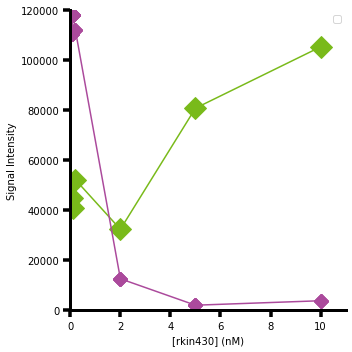

In [86]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(5,5))
#     plt.suptitle('Fitted pooled data', fontsize=30)

x1 = data[rkin].unique()
y1 = data[mIntDen].unique()

x2 = data[rkin]
y2 = data[BackDen]


ax.plot(x1, y1, color=green, marker='D', ms=15)
ax.plot(x2, y2, color=purple, marker='D', ms=10)
   

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,120000)
ax.set_xlim(-0.015,11)
ax.set_xlabel(rkin)


# ax.set_title('Rescue')
ax.set_ylabel('Signal Intensity')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
# ax.legend(loc='center right',title='Integrated Density')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
plt.savefig(path/('signal.jpg'))

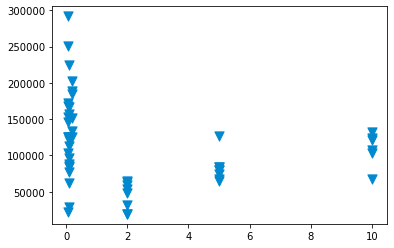

In [70]:
plt.scatter(x=rkin,y=IntDen,s=85,c=cyan,marker='v',data=data)
